In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/nlp-exercises/exercise_1_sentiment.csv

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
#file_path = '/content/drive/MyDrive/nlp-exercises/exercise_1_sentiment.csv'
file_path = 'exercise_1_sentiment.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

<ipython-input-2-cfb04ebd66c6>:10: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='ISO-8859-1')


In [15]:
# Display the first few rows of the data
from IPython.display import display
# Display the first few rows of the data
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,1.0
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,1.0
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,1.0
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,0.0
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,the cooler is really fantastic and provides go...,1.0


In [19]:
# Number of missing values
missing_values = data.isnull().sum()

# Unique value counts for categorical columns
unique_counts = data.nunique()

# Text statistics for the 'Review' and 'Summary' columns
data['Review_Length'] = data['Review'].astype(str).apply(len)
data['Summary_Length'] = data['Summary'].astype(str).apply(len)

review_stats = pd.DataFrame({
    'Average Review Length': [data['Review_Length'].mean()],
    'Max Review Length': [data['Review_Length'].max()],
    'Min Review Length': [data['Review_Length'].min()]
})

summary_stats = pd.DataFrame({
    'Average Summary Length': [data['Summary_Length'].mean()],
    'Max Summary Length': [data['Summary_Length'].max()],
    'Min Summary Length': [data['Summary_Length'].min()]
})

# Distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts()

# Display the metrics
print("Missing Values in Each Column:")
display(missing_values)

print("\nUnique Value Counts in Each Column:")
display(unique_counts)

print("\nText Statistics for 'Review' Column:")
display(review_stats)

print("\nText Statistics for 'Summary' Column:")
display(summary_stats)

print("\nDistribution of Sentiments:")
display(sentiment_distribution)

Missing Values in Each Column:


,0
ProductName,0
ProductPrice,0
Rate,0
Review,0
Summary,0
Sentiment,0
Review_Length,0
Summary_Length,0



Unique Value Counts in Each Column:


,0
ProductName,923
ProductPrice,637
Rate,11
Review,1253
Summary,74822
Sentiment,2
Review_Length,66
Summary_Length,495



Text Statistics for 'Review' Column:


,Average Review Length,Max Review Length,Min Review Length
0,11.518637,140,3



Text Statistics for 'Summary' Column:


,Average Summary Length,Max Summary Length,Min Summary Length
0,48.812732,497,1



Distribution of Sentiments:


,count
Sentiment,
1.0,111103
0.0,41956


# Let us under the Dataset

| Column Name    | Description                                                 |
|----------------|-------------------------------------------------------------|
| **ProductName** | ### The name of the product being reviewed.                |
| **ProductPrice**| The price of the product.                                  |
| **Rate**        | The rating given by the reviewer (e.g., from 1 to 5).      |
| **Review**      | The full text of the product review.                       |
| **Summary**     | A short summary of the review.                             |
| **Sentiment**   | The overall sentiment associated with the review (e.g., positive, negative, neutral). |



# Step 1 - Preprocess the text data.

In [3]:
# Preprocess the data: select relevant columns and remove neutral sentiment
data = data[data['Sentiment'] != 'neutral']  # Focus on positive and negative only
data['Sentiment'] = data['Sentiment'].map({'positive': 1, 'negative': 0})  # Map sentiment to binary

In [4]:
# Handle any NaN values in the target variable
data = data.dropna(subset=['Sentiment'])

# Step 2 - Convert the text to numerical features using TF-IDF.

In [5]:
# Reduce the number of features in TF-IDF to handle memory issues
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X = tfidf.fit_transform(data['Review'].astype(str))
y = data['Sentiment']

In [6]:
# Use a smaller subset of data for training and testing
data_sampled = data.sample(n=2000, random_state=42)
X_sampled = tfidf.transform(data_sampled['Review'].astype(str))
y_sampled = data_sampled['Sentiment']


# Step 3 - Split the dataset into training and testing sets.

In [7]:
# Split the sampled data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)


# Step 4 - Apply the KNN algorithm.

In [8]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# Make predictions
y_pred = knn.predict(X_test)

In [10]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])

# Step 5 - Visualize the results with a confusion matrix and explain the positive/negative classification.

<Figure size 800x600 with 0 Axes>

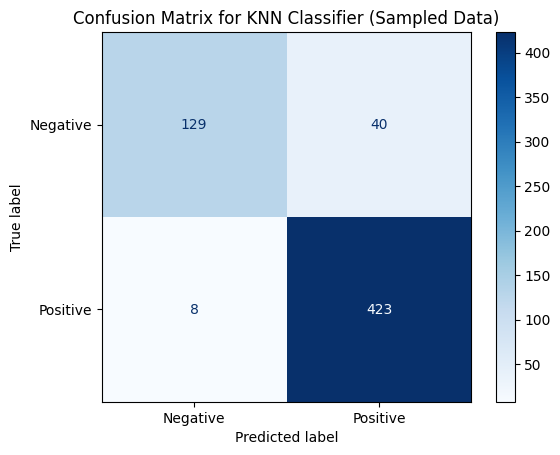

In [11]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for KNN Classifier (Sampled Data)")
plt.show()

In [12]:
# Display classification report for more insights
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.76      0.84       169
    Positive       0.91      0.98      0.95       431

    accuracy                           0.92       600
   macro avg       0.93      0.87      0.89       600
weighted avg       0.92      0.92      0.92       600

